In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


# DATASET

<h3>Dataset about predict the mobile price based on some mobile features</h3>

*  battery_power : Total energy a battery can store in one time measured in mAh
*  blue : Has bluetooth or not
*  clock_speed : speed at which microprocessor executes instructions
*  dual_sim : Has dual sim support or not
*  fc : Front Camera mega pixels
*  four_g : Has 4G or not
*  int_memory : Internal Memory in Gigabytes
*  m_dep : Mobile Depth in cm
*  mobile_wt : Weight of mobile phone
*  n_cores : Number of cores of processor
*  price_range : price range

# Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [3]:
data = pd.read_csv("../input/mobile-price-classification/train.csv")

In [4]:
data.head() #Display first top 5 rows

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
data.shape #Out dataset have 2000 rows with 21 columns

(2000, 21)

In [6]:
data.info() #Display all columns information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
data.isnull().sum() #This function return sum of null values of columns.

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
data.duplicated().any() #Returns is any duplicates rows has in our dataset.

False

# Visualization on data

In [9]:
data['price_range'].value_counts() # How many Unique value of price_range columns.

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

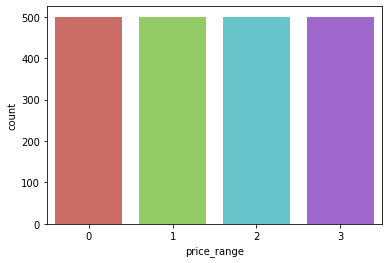

In [10]:
sns.countplot(x = 'price_range',data=data,palette = 'hls')
plt.show()

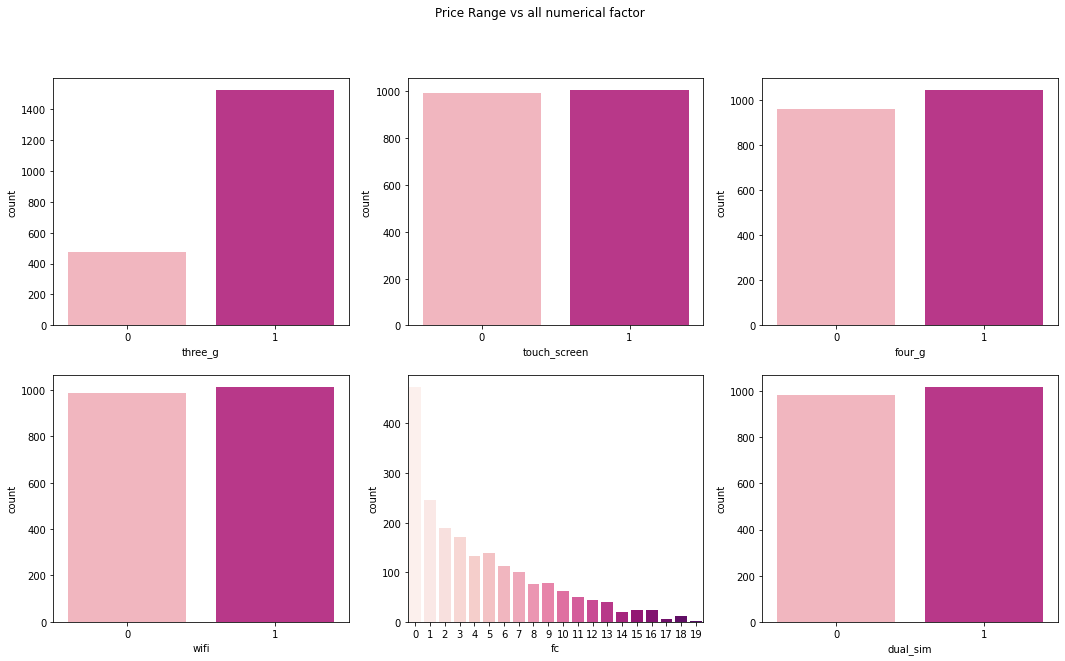

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Price Range vs all numerical factor')
sns.countplot(ax=axes[0, 0], data=data, x='three_g',palette='RdPu')
sns.countplot(ax=axes[0, 1], data=data, x='touch_screen',palette='RdPu')
sns.countplot(ax=axes[0, 2], data=data, x='four_g',palette='RdPu')
sns.countplot(ax=axes[1, 0], data=data, x='wifi',palette='RdPu')
sns.countplot(ax=axes[1,1],data = data, x ='fc' ,palette='RdPu')
sns.countplot(ax=axes[1,2],data = data, x ='dual_sim',palette='RdPu' )
plt.show()

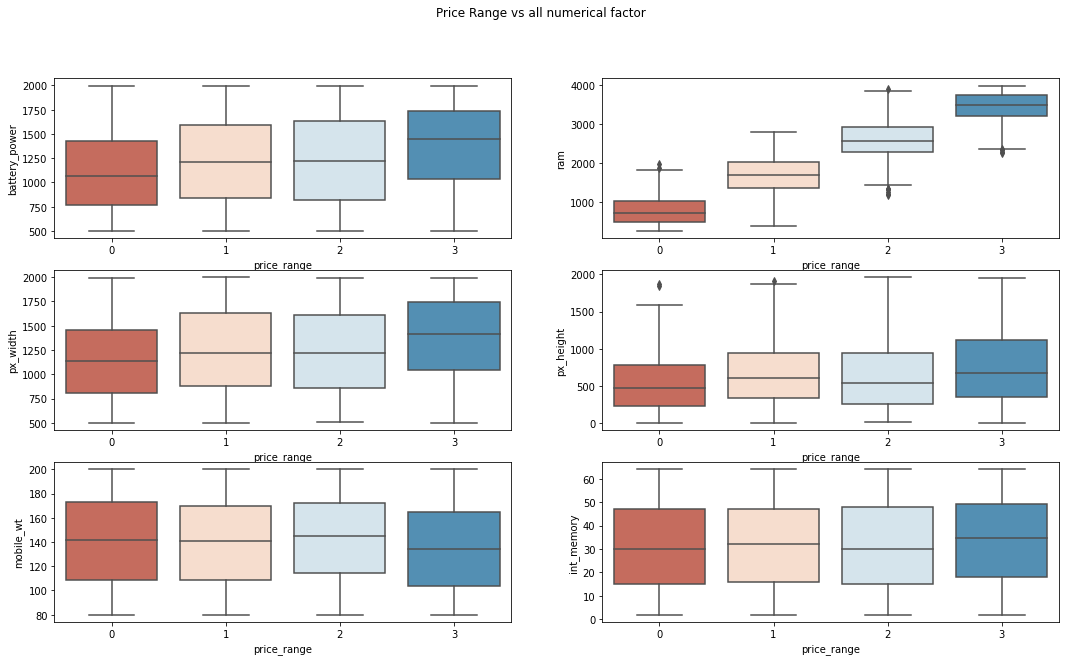

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(18, 10))

fig.suptitle('Price Range vs all numerical factor')

sns.boxplot(ax=axes[0, 0], data=data, x='price_range', y='battery_power',palette = "RdBu")
sns.boxplot(ax=axes[0, 1], data=data, x='price_range', y='ram',palette = "RdBu")
sns.boxplot(ax=axes[1, 0], data=data, x='price_range', y='px_width',palette = "RdBu")
sns.boxplot(ax=axes[1, 1], data=data, x='price_range', y='px_height',palette = "RdBu")
sns.boxplot(ax=axes[2,0],data=data,x='price_range',y='mobile_wt',palette = "RdBu")
sns.boxplot(ax=axes[2,1],data=data,x='price_range',y='int_memory',palette = "RdBu")
plt.show()

In [13]:
x = data.drop('price_range',axis=1) # x variable stores the independent variables.
y = data['price_range'] #y store the dependent variable.

# Feature Selection

# Apply SelectKBest Algorithm

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [15]:
ordered_rank_features = SelectKBest(score_func=chi2,k=20)
ordered_feature = ordered_rank_features.fit(x,y)

In [16]:
dfscores = pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns = pd.DataFrame(x.columns)

In [17]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


# Take top 10 features variables.

In [18]:
features_rank.nlargest(10,'Score')

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


# Feature Importance

# This technique gives you a score for each feature of your data, the higher the score more relevant it is

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [20]:
print(model.feature_importances_)

[0.06292452 0.01967312 0.03404876 0.02038677 0.03194064 0.01728915
 0.03583872 0.03442034 0.03624762 0.03321908 0.03369212 0.04674505
 0.04983321 0.39008295 0.03367929 0.03310083 0.03468084 0.0142091
 0.01823229 0.01975559]


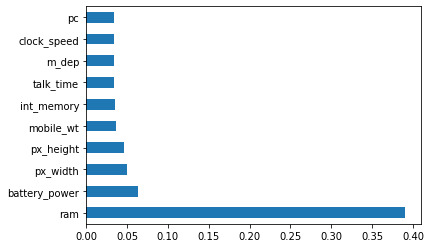

In [21]:
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

# Information Gain

In [22]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x,y)
mutual_data=pd.Series(mutual_info,index=x.columns)
mutual_data.sort_values(ascending=False)

ram              0.847341
px_height        0.028128
battery_power    0.027715
px_width         0.026806
touch_screen     0.021750
m_dep            0.018236
wifi             0.016571
three_g          0.012210
pc               0.009701
clock_speed      0.006011
mobile_wt        0.001104
dual_sim         0.000825
n_cores          0.000798
int_memory       0.000000
blue             0.000000
four_g           0.000000
fc               0.000000
sc_h             0.000000
sc_w             0.000000
talk_time        0.000000
dtype: float64

In [23]:
data = data.drop(['wifi','touch_screen','three_g','talk_time','sc_w','dual_sim','four_g','int_memory','blue','n_cores','mobile_wt','m_dep','fc'],axis=1)

In [24]:
data.head()

,battery_power,clock_speed,pc,px_height,px_width,ram,sc_h,price_range
0,842,2.2,2,20,756,2549,9,1
1,1021,0.5,6,905,1988,2631,17,2
2,563,0.5,6,1263,1716,2603,11,2
3,615,2.5,9,1216,1786,2769,16,2
4,1821,1.2,14,1208,1212,1411,8,1


In [25]:
x = data.drop('price_range',axis=1)
y = data['price_range']

In [26]:
print(x.shape)
print(y.shape)

(2000, 7)
(2000,)


# Split the dataset into train and test

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500, 7)
(500, 7)
(1500,)
(500,)


# Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
X_train

array([[-1.58954736, -0.54409463,  0.69550098, ...,  1.47195821,
         0.79794809,  1.11590168],
       [-1.06204271, -0.42202734, -1.28723859, ..., -1.73439382,
         0.97495824,  1.35539982],
       [ 1.31059626, -0.29996004,  0.86072928, ...,  0.65885313,
         1.15196839,  1.35539982],
       ...,
       [-0.09759213,  0.55451104, -1.45246689, ...,  0.87998086,
         1.4053724 ,  0.15790911],
       [-0.09532817,  1.04278023, -0.4610971 , ...,  1.26465096,
        -1.00010238,  0.39740725],
       [-1.19335288, -1.27649842,  1.52164247, ..., -0.75083612,
         0.29579825, -1.0395816 ]])

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
print(y_pred)

[3 0 2 2 2 0 0 3 3 1 1 3 0 2 3 0 3 2 2 1 0 0 3 1 2 2 3 1 3 1 1 0 2 0 2 3 0
 0 3 3 2 1 3 3 1 3 0 1 2 1 1 3 0 3 0 2 2 2 0 3 3 1 3 2 1 2 3 2 2 2 3 2 1 0
 1 3 2 2 1 2 3 3 3 0 0 0 2 1 2 3 1 2 2 1 0 3 3 3 0 3 1 1 3 1 3 2 2 3 2 3 3
 0 0 1 3 3 0 0 1 0 0 3 2 2 1 1 1 1 0 2 1 3 3 3 3 3 3 2 0 1 1 2 1 3 0 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 2 1 0 3 1 2 3 3 0 2 2 3 1 2 1 0 1 2
 1 2 0 3 3 1 1 0 2 3 0 1 2 2 0 3 3 2 1 2 3 3 3 0 0 0 2 3 3 0 0 1 3 1 3 3 3
 0 0 2 2 3 1 0 2 0 0 0 3 3 1 2 2 1 1 0 2 3 3 0 0 1 3 3 2 3 0 3 1 1 0 2 3 3
 2 0 0 1 2 3 2 2 3 1 1 0 3 3 2 1 3 2 2 2 1 0 2 2 1 0 0 2 2 2 2 0 1 3 0 1 2
 3 0 2 0 1 1 3 0 0 2 3 1 2 0 2 0 3 0 3 3 2 3 1 2 2 1 1 1 0 1 0 3 1 0 3 1 0
 1 3 0 3 1 2 0 1 3 0 2 1 1 2 1 1 0 2 0 0 3 1 2 3 2 2 0 3 2 1 1 3 2 3 3 3 0
 2 0 3 0 1 1 2 3 1 3 1 2 0 1 2 3 0 0 1 3 0 3 0 1 2 1 1 0 2 1 0 1 3 0 3 3 0
 2 1 3 1 1 3 2 0 3 2 2 0 0 3 0 1 1 1 3 2 3 2 0 3 0 0 1 3 0 0 3 2 2 2 3 0 0
 1 2 1 2 0 3 3 0 2 3 0 2 2 1 0 2 2 1 3 2 2 0 2 0 3 3 2 1 0 3 1 2 0 0 1 3 0
 3 0 0 1 2 0 1 3 0 2 2 1 

In [34]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.956


# SVM

In [35]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

# Predict the tset set result

In [36]:
y_pred = classifier.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc2 = accuracy_score(y_test, y_pred)

[[120   4   0   0]
 [  3 105   2   0]
 [  0   4 115   6]
 [  0   0   6 135]]


In [38]:
print(f"Accuracy score: {acc2}")

Accuracy score: 0.95


# Training the K-NN model on the Training set

In [39]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
from sklearn.metrics import  accuracy_score
acc3 = accuracy_score(y_test, y_pred)

In [41]:
print(f"Accuracy score: {acc3}")

Accuracy score: 0.95


# Training the Naive Bayes on the Training set

In [42]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [43]:
y_pred = classifier.predict(X_test)

In [44]:
from sklearn.metrics import  accuracy_score
acc4 = accuracy_score(y_test, y_pred)

In [45]:
print(f"Accuracy score : {acc4}")

Accuracy score : 0.828


# Training Decision Tree Classification on Train set

In [46]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [47]:
y_pred = classifier.predict(X_test)

In [48]:
from sklearn.metrics import  accuracy_score
acc5 = accuracy_score(y_test, y_pred)

In [49]:
print(f"Accuracy score: {acc5}")

Accuracy score: 0.866


# Create visualization for all model with their Accuracy

In [50]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("SVM")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Naive Bayes")
mylist.append(acc5)
mylist2.append("DTR")

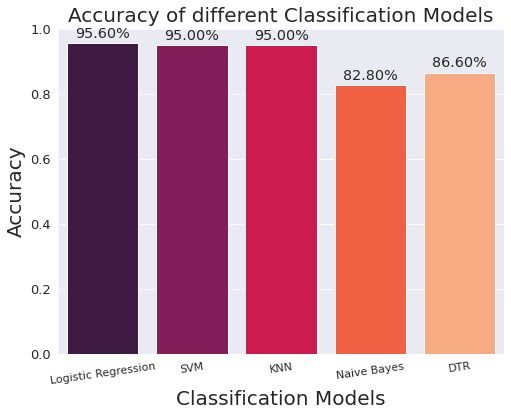

In [51]:
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

**If you have any queries about this notebook, please let me know I'll happy to explain.**

![](https://www.crownconnect.com/assets/ThankYou.jpg)